In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from IPython.display import display
import time
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the datasets (ensure correct paths and files)
train_features = pd.read_csv('../data/processed_data/training_features.csv')
test_features = pd.read_csv('../data/processed_data/testing_features.csv')

test_labels = pd.read_csv('../data/processed_data/week_9_test_target.csv') 

train_labels = pd.read_csv('../data/processed_data/training_target_features.csv')

In [19]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(train_features)  # Standardize the features

# Transform the test data using the already-fitted scaler
#X_scaled_test = scaler.transform(test_features) 

X = train_features  # Input features
y = train_labels  # Target variable

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\fishm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8846
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1205
           1       0.95      0.84      0.89      1568

    accuracy                           0.88      2773
   macro avg       0.88      0.89      0.88      2773
weighted avg       0.89      0.88      0.89      2773



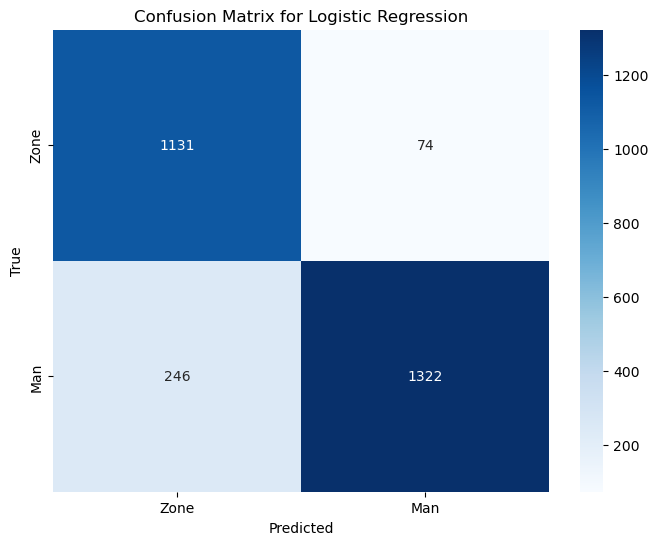

In [20]:
# Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Zone', 'Man'], yticklabels=['Zone', 'Man'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
import joblib

# Export the trained Logistic Regression model
joblib.dump(log_reg, 'logreg_model2.pkl')  # Save the model to a file

['logreg_model2.pkl']